## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [5]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

In [16]:
#用來判斷變異數的相關性(自己寫)

def valiate_etaSq(etaSq):
    if etaSq<.01:
        qual='Negliigible'
    elif etaSq<.06:
        qual='Small'
    elif etaSq<.14:
        qual='Medium'
    else:
        qual='Large'
    return qual


## 讀入資料

In [50]:
df_train = pd.read_csv("39_Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [112]:
#依題目，產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態
df=df_train.copy()
df['Survived_cate']=df['Survived']
df['Survived_cate']=df['Survived_cate'].astype('object')

In [113]:
#依題目刪除遺失值
df=df[['Age','Survived_cate']]
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            714 non-null    float64
 1   Survived_cate  714 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


In [ ]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate

###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


因為連續VS離散，所以要用變異數分析

In [114]:
df

,Age,Survived_cate
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [115]:
aov=pg.anova(dv='Age',between='Survived_cate',data=df,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [116]:
etaSq=aov.SS[0]/(aov.SS[0]+aov.SS[1])
etaSq

0.0059630974469252

In [117]:
valiate_etaSq(etaSq)

'Negliigible'

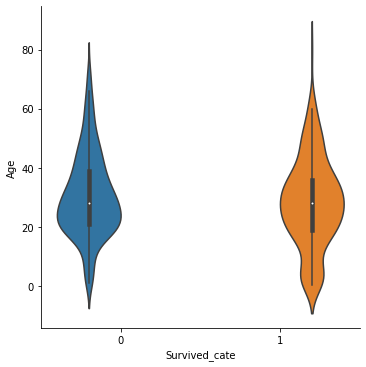

In [118]:
g=sns.catplot(x='Survived_cate',y='Age',hue='Survived_cate',data=df,kind='violin')

結論：無相關

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


因離散VS離散，所以要用卡方

In [100]:
df=df_train.copy()
df=df[['Sex','Survived']]
df['Survived_cate']=df['Survived']
df['Survived_cate']=df['Survived_cate'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            891 non-null    object
 1   Survived       891 non-null    int64 
 2   Survived_cate  891 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [101]:
df

,Sex,Survived,Survived_cate
0,male,0,0
1,female,1,1
2,female,1,1
3,female,1,1
4,male,0,0
...,...,...,...
886,male,0,0
887,female,1,1
888,female,0,0
889,male,1,1


In [102]:
contTable=pd.crosstab(df['Sex'],df['Survived_cate'])
contTable

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [103]:
v=min(contTable.shape[0],contTable.shape[1])-1
v

1

In [107]:
crosstab,res=researchpy.crosstab(df['Sex'],df['Survived_cate'],test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.5434


In [109]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(v,res.loc[2,'results'])

'large'

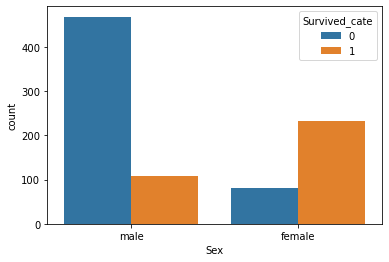

In [111]:
#搭配圖形觀察
g=sns.countplot(x='Sex',hue='Survived_cate',data=df)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

因為連續VS連續，所以用Person相關係數

In [119]:
df=df_train.copy()
df=df[['Age','Fare']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


In [120]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    714 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [121]:
corr,_=stats.pearsonr(df['Age'],df['Fare'])
print(corr)

0.0960666917690389


In [122]:
def validated_pearconr(corr):
    v=corr
    if v<0:v=v*(-1)
        
    if corr==1:
        str='完全線性相關'
    elif corr>.7:
        str='高度線性相關'
    elif corr>.4:
        str='中度線性相關'
    elif corr>.1:
        str='低度線性相關'
    elif corr>0:
        str='無線性相關'
    
    if v!=corr:str='負'+str
    return str

In [123]:
validated_pearconr(corr)

'無線性相關'

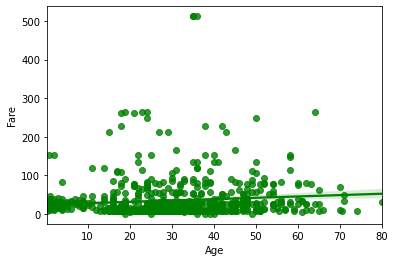

In [127]:
g=sns.regplot(x='Age',y='Fare',color='g',data=df)